several problems:

1. For the only '1,4,d' conm, the data-span should be from 2005-2014, need to adjust the panel.
2. Drop the duplicated manufacturer, only use the conm.
3. check the treat time for '1,4,d', if 2008 or 2009.
4. make the treat year for conms that have two chems as only 2007.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
nyt_20012010 = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/nyt1_summary_epa.csv')
nyt_20112021 = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/nyt2_summary_epa.csv')
twp = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/twp_summary_epa.csv')

In [459]:
nyt_20012010.shape[0] + nyt_20112021.shape[0] + twp.shape[0]

1051

In [4]:
# Concatinate two nyt files

nyt = pd.concat([nyt_20012010, nyt_20112021])
nyt.sample(1)

,GOID,Date,Title,Text,Author,Source,Chemical,Chemical_Comb,Summary
137,432713349,2004-03-12,Brooklyn Grade School Closed After Asbestos Co...,A Brooklyn elementary school was ordered close...,"Tavernise, Sabrina",Newspapers,asbestos,Asbestos|asbestos,A Brooklyn elementary school was ordered close...


In [5]:
# Combine nyt & twp into one df.

nyt['Source'] = 'nyt'
twp['Source'] = 'twp'

> Check all the summary and clean the news(news_summary_all.csv). Only keep those relative to the chemical(news_all_filter.csv).

In [2]:
news_clean = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/news_all_filter.csv')
news_clean.groupby(['Chem_Comb']).count()

,GOID,Date,Title,Text,Author,Source,Chemical,Summary
Chem_Comb,,,,,,,,
"1,4-dioxane",7,7,7,7,4,7,7,7
Asbestos|asbestos,653,653,653,653,418,653,653,653
Cyclic Aliphatic Bromide Cluster (HBCD)|cyclic aliphatic bromide cluster|HBCD,1,1,1,1,1,1,1,1
"Di-isononyl phthalate (DINP) _ (1,2-benzenedicarboxylic acid, 1,2-diisononyl ester)|DINP",4,4,4,4,4,4,4,4
"Dibutyl phthalate (1,2-Benzene- dicarboxylic acid, 1,2- dibutyl ester)|dibutyl phthalate",2,2,2,2,2,2,2,2
Formaldehyde|formaldehyde,72,72,72,72,49,72,72,72
Methylene Chloride|methylene chloride,2,2,2,2,2,2,2,2
N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,4,4,4,4,4,4,4,4
Trichlorethylene (TCE)|trichloroethylene|TCE,39,39,39,39,27,39,39,39


#### Step1: Mark the treated & control chems.

>Treated: Formaldehyde|formaldehyde and 1,4-dioxane are two suitable chems. The reasons are:

1.They were reported harmful according to scientific discoveries after 2010(not as early as asbestos and TCE). 

2.The causal relationship was uncertain when reported and the gov/firm had not given any responses by then. AKA, the media stepped in at the initial stage.

3.The amount of reports are enough to arrouse attentions.

4.I can compare the results between the two treated chemicals, as formaldehyde has more public release than 1,4-dioxane.

>Control: The Chems reported by neither nyt nor twp, or reported very few. 
Chems exclude 1,4-dioxane, Formaldehyde|formaldehyde, Asbestos|asbestos, and Trichlorethylene (TCE)|trichloroethylene|TCE.

In [458]:
#Treat: 2
#Control: 29 out of 33 EPA chemicals were reported nothing or few.

import json
with open('EPA_chemnames_dic.json', 'r') as openfile:
    
    # Reading from json file
    epa_chems_dic = json.load(openfile) #Link the chem_name in EPA table to all its varients.

control_chems = set(epa_chems_dic.values()) - \
                {'1,4-dioxane', 'Asbestos|asbestos', \
                 'Formaldehyde|formaldehyde', 'Trichlorethylene (TCE)|trichloroethylene|TCE'}

### NOT Sure: the treat time. Is it good to use the earliest report date? Or the date reported by both outlets? Or start date of a series of reports. Need to go back to this if the Causal Inference is not ideal.

In [465]:
treat_f = news_clean.loc[news_clean.Chem_Comb == 'Formaldehyde|formaldehyde']
treat_d = news_clean.loc[news_clean.Chem_Comb == "1,4-dioxane"]

In [475]:
treat_f.Date.min(), treat_d.Date.min()

('2006/4/23', '2008/3/15')

In [473]:
treat_f['treat_date'] = treat_f.Date.min()
treat_d['treat_date'] = treat_d.Date.min()
treat_df = pd.concat([treat_f, treat_d])
treat_f.shape, treat_d.shape, treat_df.shape

((72, 10), (7, 10), (79, 10))

In [483]:
treat_df.groupby(['Chem_Comb', 'treat_date'])['Title'].count()

Chem_Comb                  treat_date
1,4-dioxane                2008/3/15      7
Formaldehyde|formaldehyde  2006/4/23     72
Name: Title, dtype: int64

For the news DF, the important/useful columns are 'Chem_Comb' & 'treat_date'.
The former is used for merge with EPA(CASRN)&CPCat, the latter is for research.

#### Step2: Work on the EPA chems, using the CASRN code to match with the manufacturers in CPCat. 

In [523]:
# Add the CASRN and other basic info for all the chems,
# by web-scraping the table directly from the EPA website.

import requests
from bs4 import BeautifulSoup
import re

page = requests.get('https://www.epa.gov/assessing-and-managing-chemicals-under-tsca/chemicals-undergoing-risk-evaluation-under-tsca') # Getting page HTML through request
soup = BeautifulSoup(page.content, 'html.parser') # Parsing content using beautifulsoup

# Scrape all the chemicals into a table
def create_chem_table(soup):
    cms = []
    casrn = []
    date = []
    status = []
    chem_tag = soup.table.find_all('tr')[1:]
    for chem in chem_tag:
        chem_info = chem.find_all('td')
        casrn_list = re.split(';|,', chem_info[1].text)
        for i in range(len(casrn_list)):
            cms.append(re.sub('\xa0', '', chem_info[0].text.strip()))
            casrn.append(casrn_list[i].strip())
            date.append(chem_info[3].text.strip())
            status.append(chem_info[5].text.strip())
    return pd.DataFrame({'Chemical_Name': cms, 'CASRN': casrn,\
                           'Date_Initiated': date, 'Status': status})

chem_table = create_chem_table(soup)
chem_table.sample(1)

,Chemical_Name,CASRN,Date_Initiated,Status
27,N-Methylpyrrolidone (NMP),872-50-4,December 2016,Final risk evaluation (December 2020)


In [575]:
# Add Chem_Comb to each chemical.
# As treat_chems and control_chems are both combinations of name. Also link them to CASRN.
# Use epa_chems_dic: keys   - the original name appeared in EPA table, 
#                    values - combination of other forms connected by "|".

chem_name_df = pd.DataFrame({'Chemical_Name': epa_chems_dic.keys(),\
                             'Chem_Comb': epa_chems_dic.values()})   
                                #Principal name: Combination of varient names

chem_table = pd.merge(chem_name_df,                      
                      chem_table, on = 'Chemical_Name')

In [576]:
# Label treat_date for the treated. 

def label_treat_date(row):
    if row['Chem_Comb'] == 'Formaldehyde|formaldehyde':
        return '2006/4/23'
    if row['Chem_Comb'] == "1,4-dioxane":
        return treat_d.Date.min()
    
chem_table['treat_date'] = chem_table.apply(lambda row: \
                                            label_treat_date(row), axis=1)
chem_table

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,treat_date
0,Asbestos,Asbestos|asbestos,1332-21-4,December 2016,"Part 1: Final risk evaluation (December 2020),...",None
1,1-Bromopropane,1-Bromopropane|1-bromopropane|1-BP,106-94-5,December 2016,Final risk evaluation (August 2020),None
2,Carbon Tetrachloride,Carbon Tetrachloride|carbon tetrachloride,56-23-5,December 2016,"Final risk evaluation (November 2020), Propose...",None
3,Cyclic Aliphatic Bromide Cluster (HBCD),Cyclic Aliphatic Bromide Cluster (HBCD)|cyclic...,25637-99-4,December 2016,Final risk evaluation (August 2020),None
4,Cyclic Aliphatic Bromide Cluster (HBCD),Cyclic Aliphatic Bromide Cluster (HBCD)|cyclic...,3194-55-6,December 2016,Final risk evaluation (August 2020),None
5,Cyclic Aliphatic Bromide Cluster (HBCD),Cyclic Aliphatic Bromide Cluster (HBCD)|cyclic...,3194-57-8,December 2016,Final risk evaluation (August 2020),None
6,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,December 2016,"Final risk evaluation (June 2020), Proposed ri...",None
7,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,December 2016,Final risk evaluation (December 2020),None
8,Perchloroethylene,Perchloroethylene|perchloroethylene,127-18-4,December 2016,"Final risk evaluation (December 2020), Propose...",None
9,Trichlorethylene (TCE),Trichlorethylene (TCE)|trichloroethylene|TCE,79-01-6,December 2016,Final risk evaluation (November 2020),None


In [856]:
chem_table.dtypes

Chemical_Name     object
Chem_Comb         object
CASRN             object
Date_Initiated    object
Status            object
treat_date        object
dtype: object

In [760]:
# Add Manufacturers for each chem using CPCat dataset. 

# cpcat_path = '/Users/sunxiaoting/Harris_Capp/EPIC/Data/EPA/CPCat/CPCat/CPCat_distribution_2014_05_21/CPCat dist 2014-05-21/products.csv'
# cpcat = pd.read_csv(cpcat_path, encoding='ISO-8859-1') 


# # The merge with CPCat on CASRN problem is the first empty string ahead of the value.Delete it!
# cpcat['CASRN'] = cpcat.CASRN.map(lambda x: x[1:])

# Get the whole chem-table-firm DF.
chem_firm = chem_table.merge(cpcat[['CASRN', 'Manufacturer']].drop_duplicates(), how = 'left', on='CASRN')
chem_firm.sample(3)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,treat_date,Manufacturer
2443,Trichlorethylene (TCE),Trichlorethylene (TCE)|trichloroethylene|TCE,79-01-6,December 2016,Final risk evaluation (November 2020),None,JET-LUBE INC
636,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,December 2016,"Final risk evaluation (June 2020), Proposed ri...",None,FINE ORGANICS CORPORATION (HEXEL CORPORATION)
279,Carbon Tetrachloride,Carbon Tetrachloride|carbon tetrachloride,56-23-5,December 2016,"Final risk evaluation (November 2020), Propose...",None,NEOGARD CORP.


In [761]:
chem_firm.shape

(4946, 7)

In [579]:
chem_firm.groupby('Chem_Comb').count()

,Chemical_Name,CASRN,Date_Initiated,Status,treat_date,Manufacturer
Chem_Comb,,,,,,
"1,1,2-Trichloroethane|1,1,2-trichloroethane",15,15,15,15,0,15
"1,1-Dichloroethane|1,1-dichloroethane",9,9,9,9,0,9
"1,2-Dichloroethane|1,2-dichloroethane",98,98,98,98,0,98
"1,2-Dichloropropane|1,2-dichloropropane",13,13,13,13,0,13
"1,3,4,6,7,8-Hexahydro-4,6,6,7,8,8-hexamethylcyclopenta [g]-2-benzopyran (HHCB)|HHCB",2,2,2,2,0,1
"1,3-Butadiene|1,3-butadiene",30,30,30,30,0,30
"1,4-dioxane",245,245,245,245,245,244
1-Bromopropane|1-bromopropane|1-BP,14,14,14,14,0,14
"4,4'-(1-Methylethylidene)bis[2, 6-dibromophenol] (TBBPA)|TBBPA",5,5,5,5,0,4


#### !Note: here the firm refers to manufacturers! 

In [659]:
# Now mark the firms. A firm can not be abandoned('Asbestos', 'TCE')
# treated('Formaldehyde', '1,4-dioxane'), and control at the same time.
# Move the abandoned from both the treated & control; move the treated from the control.

drop_firm = chem_firm.loc[(chem_firm.Chem_Comb == 'Asbestos|asbestos')\
                        | (chem_firm.Chem_Comb == 'Trichlorethylene (TCE)|trichloroethylene|TCE')]\
                     .Manufacturer.unique().tolist()

treat_firm = set(chem_firm.loc[~chem_firm.treat_date.isna()].Manufacturer.unique().tolist())\
             - set(drop_firm)

control_firm = set(chem_firm.loc[chem_firm.treat_date.isna()].Manufacturer.unique().tolist())\
                - set(drop_firm) - treat_firm

In [780]:
# Check the treat firm:
set(chem_firm.loc[~chem_firm.treat_date.isna()].Manufacturer.unique())\
== set(chem_firm.loc[(chem_firm.Chem_Comb == '1,4-dioxane')\
            | (chem_firm.Chem_Comb == 'Formaldehyde|formaldehyde')]\
            .Manufacturer.unique())

True

#### Note: 1. Actually I can keep the firms that stayed in both treat & control as treated, and only move the intersections from the control group. 2. For the two treated chems,  some firms manufactured both. I can keep them, though it may be hard to tell the treat date. Need to solve this later. 3. Not sure in treat_inter: COURTAULDS COATINGS (INC) & COURTAULDS PLC

In [661]:
len(drop_firm), len(treat_firm), len(control_firm)

(416, 870, 2237)

In [711]:
# Now match the manufacturers of treat & control seperately.

# treat_firm_pure.json: treat firms deleting the ones that also exist in control.
# treat_firm_intersec.json: firms exist in both treat & control.

# For the study: use the 'treat_firm.json': Because, the treated firms don't 
# affect the treatment effect, but effect the control baseline.
# And this makes the numbers of the two groups balanced.

with open('treat_firm.json', 'w') as outfile:
    json.dump({"treat_firm": list(treat_firm)}, outfile)

with open('control_firm.json', 'w') as outfile:
    json.dump({"control_firm": list(control_firm)}, outfile)

# Move to Matching-Algo to get the matched pairs, store in 'treat_rd_matches.csv'

In [715]:
# After manually check the matched pairs.

matches_treat = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/treat_rd_matches.csv')
matches_control = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/control_rd_matches.csv')

In [718]:
matches_treat.shape, matches_control.shape

((131, 2), (185, 2))

#### !Note: here the keeped firms refer to conm! 

In [727]:
# Further clean the controls: 
# Need to delete the conm in matches_control that already exist in matches_treat,
# because multiple manufacturers may link to the same conm, 
# though the different manufacturers split into two groups.

matches_control = matches_control.loc[~matches_control.conm\
                                           .isin(set(matches_treat.conm.unique())\
                                           .intersection(matches_control.conm.unique()))]

In [748]:
# Check: No overlaps! If a conm don't exist in two groups, so should the corresponding manufacturer!
print(set(matches_control.conm.unique()).intersection(matches_treat.conm.unique()),
set(matches_control.Manufacturer.unique()).intersection(matches_treat.Manufacturer.unique()))

set() set()


In [739]:
matches_treat.shape, matches_control.shape, \
matches_treat.conm.nunique(), matches_control.conm.nunique() 
# The number of treated conm and control conm are balanced.

((131, 2), (88, 2), 69, 60)

In [765]:
# Merge the matches back to chem_firm

chem_firm_match = chem_firm.merge(\
                                  pd.concat([matches_treat, matches_control]),\
                                  on='Manufacturer')
chem_firm_match.sample(5)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,treat_date,Manufacturer,conm
90,Phthalic anhydride,Phthalic anhydride|phthalic anhydride,85-44-9,December 2019,Final scope (August 2020),None,3M COMPANY,3M CO
339,"1,4-dioxane","1,4-dioxane",123-91-1,December 2016,Final risk evaluation (December 2020),2008/3/15,UNION CARBIDE CORP. LINDE DIV,UNION CARBIDE CORP
25,"Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...","Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...",117-81-7,December 2019,Final scope (August 2020),None,SHERWIN-WILLIAMS COMPANY,SHERWIN-WILLIAMS CO
64,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,December 2019,Final scope (August 2020),None,EASTMAN KODAK COMPANY,EASTMAN KODAK CO
104,"Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...","Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...",117-81-7,December 2019,Final scope (August 2020),None,"KOPPERS COMPANY, INC.",KOPPERS CO


In [764]:
chem_firm_match.shape

(407, 8)

#### !Note: a None treat_date conm can serve as a treat (as a conm can have treat_date and None for multiple chems), and may not be a control (if it has a treat_date for one chemical, and should be eliminated from the control). A control firm should have no treat_date records for any chemical. 

#### For example, 'EASTMAN KODAK CO' have None and existing treat_date. It is in matches_treat, but not in matches_control. Thus, treat_date can not be used to mark the treat/control firm, manufacturers neither, should use conm.

In [813]:
chem_firm_match.loc[chem_firm_match.conm == 'EASTMAN KODAK CO']

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,treat_date,Manufacturer,conm
52,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,December 2016,"Final risk evaluation (June 2020), Proposed ri...",None,EASTMAN KODAK CO,EASTMAN KODAK CO
53,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),2006/4/23,EASTMAN KODAK CO,EASTMAN KODAK CO
54,"1,4-dioxane","1,4-dioxane",123-91-1,December 2016,Final risk evaluation (December 2020),2008/3/15,EASTMAN KODAK CO,EASTMAN KODAK CO
61,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,December 2016,"Final risk evaluation (June 2020), Proposed ri...",None,EASTMAN KODAK COMPANY,EASTMAN KODAK CO
62,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,December 2016,Final risk evaluation (December 2020),None,EASTMAN KODAK COMPANY,EASTMAN KODAK CO
63,Perchloroethylene,Perchloroethylene|perchloroethylene,127-18-4,December 2016,"Final risk evaluation (December 2020), Propose...",None,EASTMAN KODAK COMPANY,EASTMAN KODAK CO
64,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,December 2019,Final scope (August 2020),None,EASTMAN KODAK COMPANY,EASTMAN KODAK CO
65,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),2006/4/23,EASTMAN KODAK COMPANY,EASTMAN KODAK CO
66,"1,4-dioxane","1,4-dioxane",123-91-1,December 2016,Final risk evaluation (December 2020),2008/3/15,EASTMAN KODAK COMPANY,EASTMAN KODAK CO
181,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,December 2016,"Final risk evaluation (June 2020), Proposed ri...",None,EASTMAN KODAK,EASTMAN KODAK CO


In [817]:
# Mark the treated & control firm, and stored in the variable 'treat_firm'.
# matches_control & matches_treat are the clean/final units for the study!

def mark_treated_firm(row):
    if row['conm'] in matches_control.conm.unique():
        return 0
    elif row['conm'] in matches_treat.conm.unique():
        return 1

chem_firm_match["treat_firm"] = chem_firm_match.apply(mark_treated_firm, axis=1)
chem_firm_match.sample(5)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,treat_date,Manufacturer,conm,treat_firm
225,"Butyl benzyl phthalate - 1,2-Benzene- dicarbox...","Butyl benzyl phthalate - 1,2-Benzene- dicarbox...",85-68-7,December 2019,Final scope (August 2020),None,FORD MOTOR CO,FORD MOTOR CO,0
235,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),2006/4/23,SHERWIN WILLIAMS,SHERWIN-WILLIAMS CO,1
172,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,December 2016,"Final risk evaluation (June 2020), Proposed ri...",None,BERKSHIRE HATHAWAY K AND W PRODUCTS DIV,BERKSHIRE HATHAWAY,0
248,Perchloroethylene,Perchloroethylene|perchloroethylene,127-18-4,December 2016,"Final risk evaluation (December 2020), Propose...",None,VALVOLINE OIL CO,VALVOLINE INC,1
243,"1,2-Dichloroethane","1,2-Dichloroethane|1,2-dichloroethane",107-06-2,December 2019,Final scope (August 2020),None,EASTMAN KODAK CO.,EASTMAN KODAK CO,1


In [819]:
# Every conm belongs to a group.
chem_firm_match.conm.isna().any()

False

In [826]:
# Change to datetime:

chem_firm_match['treat_date'] = pd.to_datetime(chem_firm_match['treat_date'])
chem_firm_match['Date_Initiated'] = pd.to_datetime(chem_firm_match['Date_Initiated'])

In [876]:
# Check the number of treat_date(0, 1, 2) for a conm.

treat_time = chem_firm_match.groupby(["conm"])['treat_date'].nunique()\
                .reset_index().rename(columns = {'treat_date': 'count_treat_date'})
                               #Debug: need to add colunms in rename()
chem_firm_match = chem_firm_match.merge(treat_time)
chem_firm_match.sample(2)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,treat_date,Manufacturer,conm,treat_firm,count_treat_date
152,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,2016-12-01,"Final risk evaluation (June 2020), Proposed ri...",NaT,"WATSCO,INC.",WATSCO INC,0,0
251,"Butyl benzyl phthalate - 1,2-Benzene- dicarbox...","Butyl benzyl phthalate - 1,2-Benzene- dicarbox...",85-68-7,2019-12-01,Final scope (August 2020),NaT,PRATT AND LAMBERT INC,PRATT & LAMBERT UNITED INC,1,2


In [873]:
# Find the conm only treated in 2008, AKA produced '1,4-dioxane' and not Formaldehyde.
# For those, the treat time should be 2008, and for other treated it should be 2006.

chem_firm_match.loc[(chem_firm_match.count_treat_date == 1) \
                    & (chem_firm_match.treat_date.dt.year == 2008)].conm.unique()
# !Debug: select rows conditional on the datetime after a year, should not use df.col.year
# This would get the error: 'Series' object has no attribute 'treat_date'.
# Should use Series.dt.year: add 'dt' after df.col

array(['DOW INC', 'OAKITE PRODUCTS', 'VULCAN MATERIALS CO',
       'VALVOLINE INC', 'AKZO NOBEL NV', 'SMITH & NEPHEW PLC',
       'ASHLAND GLOBAL HOLDINGS INC', 'CARBORUNDUM CO',
       'PERFECTDATA CORP', 'SCOTT & FETZER CO', 'MCKESSON CORP',
       'STEPAN CO'], dtype=object)

In [912]:
# Mark the treat_date for chem and for conm seperately. 
# 16 conms have two treat_date, their treat time should be 2006. 
# 41 out of 53 conm produced only Formaldehyde(2006), 12 out of 53 produced only '1,4-dioxane'(2008).

#chem_firm_match.rename(columns = {'treat_date': 'chem_treat_date'}, inplace=True)

def label_conm_treat_date(row):
    if row['count_treat_date'] == 2:
        return chem_firm_match.chem_treat_date.min()
    elif row['count_treat_date'] == 1:
        return chem_firm_match.loc[chem_firm_match.conm == row.conm].chem_treat_date.min()
    
chem_firm_match['conm_treat_date'] = chem_firm_match.apply(lambda row: \
                                            label_conm_treat_date(row), axis=1)

In [913]:
# Check the number, correct!

chem_firm_match.groupby(['conm_treat_date'])['conm'].nunique()

conm_treat_date
2006-04-23    57
2008-03-15    12
Name: conm, dtype: int64

In [936]:
chem_firm_match.sample(2)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date
63,o-Dichlorobenzene,o-Dichlorobenzene|o-dichlorobenzene,95-50-1,2019-12-01,Final scope (August 2020),NaT,DOW CHEMICAL U S A,DOW INC,1,1,2008-03-15
37,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,SHERWIN WILLIAMS,SHERWIN-WILLIAMS CO,1,1,2006-04-23


In [933]:
# The time ending treatment should be the Date_Initiated by EPA.
chem_table.loc[~chem_table.treat_date.isna()]

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,treat_date
23,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),2006/4/23
35,"1,4-dioxane","1,4-dioxane",123-91-1,December 2016,Final risk evaluation (December 2020),2008/3/15


#### Putting aside the conm_treat_date ahead. May set the treat date as below. Also need to take the many None compustat data into account.

In [963]:
# The time starting treatment should be the earliest time of large numbers of news reports.
# Thus, the t0 period for Formaldehyde|formaldehyde is 2007!

news = pd.read_csv('news_all_filter.csv')
news.loc[news.Chem_Comb == 'Formaldehyde|formaldehyde'].groupby("Date").count()

,GOID,Title,Text,Author,Source,Chemical,Chem_Comb,Summary
Date,,,,,,,,
2006/4/23,1,1,1,0,1,1,1,1
2007/10/18,1,1,1,1,1,1,1,1
2007/7/20,2,2,2,1,2,2,2,2
2007/7/22,1,1,1,0,1,1,1,1
2007/7/24,1,1,1,0,1,1,1,1
2007/8/15,1,1,1,0,1,1,1,1
2007/9/5,1,1,1,0,1,1,1,1
2008/1/18,1,1,1,0,1,1,1,1
2008/1/27,1,1,1,1,1,1,1,1


In [964]:
# The reports about '1,4-dioxane' are too few each year.

news.loc[news.Chem_Comb == '1,4-dioxane'].groupby("Date").count()

,GOID,Title,Text,Author,Source,Chemical,Chem_Comb,Summary
Date,,,,,,,,
2008/3/15,1,1,1,0,1,1,1,1
2009/3/13,1,1,1,0,1,1,1,1
2009/3/14,1,1,1,0,1,1,1,1
2014/1/18,1,1,1,1,1,1,1,1
2016/6/12,1,1,1,1,1,1,1,1
2017/9/20,1,1,1,1,1,1,1,1
2018/6/8,1,1,1,1,1,1,1,1


#### Three things to think about:
1. How to normalize: the r&d expense divided by the net income of the same year or previous year is my y. (need to run the regression to decide).
2. What is the proper period of pre-treat & post-treat (5 years?).
2. How to deal with '1,4-dioxane'. It seems that the reports are few & seperate. Need to check the number of Non in these firms.

### Merge with the rd datasets.

In [ ]:
# After checking the Compustat Dataset, the following three conms 
# do not exist in my study period if not change their names a little bit.
# Thus, Replace: (Find the three by checking the LobbyView.)

# 'ASHLAND GLOBAL HOLDINGS INC' to 'ASHLAND INC'
# 'TRINITY INDUSTRIES' TO 'TRINITY INDUSTRIES INC'
# 'KOPPERS CO' TO 'KOPPERS HOLDINGS INC'

# chem_firm_match.replace({'conm': 'ASHLAND GLOBAL HOLDINGS INC'}, 'ASHLAND INC', inplace=True)
# chem_firm_match.replace({'conm': 'TRINITY INDUSTRIES'}, 'TRINITY INDUSTRIES INC', inplace=True)
# chem_firm_match.replace({'conm': 'KOPPERS CO'}, 'KOPPERS HOLDINGS INC', inplace=True)

In [1073]:
# Now shortcut the Compustat financial data.
# compustat0802.csv file is the latest download data.

rd = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/compustat0802.csv')
keep_cols = ['conm', 'gvkey', 'fyear', 'act', 'lct', 'sale', 'ni', 'mkvalt', 'xad', 'xrd']

# Add the rd financial data to the treat&control.
chem_rd = chem_firm_match.merge(rd[keep_cols],  on='conm')
chem_rd.shape

(5392, 20)

In [1075]:
# Some conms didn't have financial records in Compustats during 1996-2018

chem_firm_match.conm.nunique(), chem_rd.conm.nunique()

(128, 95)

In [1083]:
# The missing conms in 'chem_rd' from 'chem_firm_match' are: 
lost_conm.conm.unique()

array(['ENVIROTECH CORP', 'COOK PAINT & VARNISH', 'ALDRICH CHEMICAL INC',
       'PREMIER INDUSTRIAL CP', 'ALLIED CORP', 'KAR PRODUCTS INC',
       'MALLINCKRODT INC  -OLD', 'KOPPERS CO', 'CHEM-TRONICS INC',
       'DICK (A.B.) CO', 'OAKITE PRODUCTS', 'DIVERSEY CORP',
       'GUARDSMAN PRODUCTS INC', 'POLY-TECH INC', 'CERTIFIED CORP',
       'PRATT & LAMBERT UNITED INC', 'HAMPTON RESOURCES CORP',
       'LAWSON PRODUCTS', 'ASHLAND OIL CANADA LTD',
       'KEARNEY NATIONAL INC', 'EL DORADO INTERNATIONAL INC',
       'PRODUCTS RESEARCH & CHEMICAL', 'KEUFFEL & ESSER CO',
       'CARBOLINE CO', 'TRINITY INDUSTRIES', 'GIBSON-HOMANS CO',
       'DE SOTO INC', 'UNITEK CORP', 'AMERICAN CYANAMID CO',
       'CELANESE CORP-OLD', 'INSTRUMENTATION LABS INC', 'DIAL CORP',
       'STAUFFER CHEMICAL CO', 'ASHLAND GLOBAL HOLDINGS INC',
       'CARBORUNDUM CO', 'SCOTT & FETZER CO'], dtype=object)

In [1085]:
# This is the final whole dataset for my study.
# Merge by chem(EPA&news)-matches(manufacturer-conm)-Compustat 
chem_rd.head(1)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date,gvkey,fyear,act,lct,sale,ni,mkvalt,xad,xrd
0,1-Bromopropane,1-Bromopropane|1-bromopropane|1-BP,106-94-5,2016-12-01,Final risk evaluation (August 2020),NaT,ALDRICH CHEMICAL CO INC./SUB OF SIGMA-ALDRICH ...,SIGMA-ALDRICH CORP,0,0,NaT,9699,1996,666.637,110.317,1034.565,147.856,NaN,NaN,NaN


> Try1: 

Pre-period: 4 years before 2007(t0 year). 2003\2004\2005\2006

Post-peirod: Actually I can download Compustat data up to 2019, as the Date_Initiated of 'Formaldehyde' is 'December 2019'. Considering the None values after 2012, setting 2012 as the end treatment year.

In [1297]:
# Calculate the y:

# y1 = xrd/ni_preyear
# y2 = xrd/ni
# y3: sale(How to normalize?)

chem_rd['ni_preyear'] = chem_rd.ni.shift(1)
chem_rd['xrd_ni_preyear'] = chem_rd["xrd"]/chem_rd["ni_preyear"]*100
chem_rd['xrd_ni'] = chem_rd["xrd"]/chem_rd["ni"]*100

# It's not ideal to use act/mkvalt as the divident, 
# as there're many None values in such columns, and 0 None value in 'ni'.
# chem_rd['act_preyear'] = chem_rd.act.shift(1)
# chem_rd['xrd_act_preyear'] = chem_rd["xrd"]/chem_rd["act_preyear"]*100
# chem_rd['xrd_act'] = chem_rd["xrd"]/chem_rd["act"]*100

In [1381]:
chem_rd['chem_treat_year'] = chem_rd.chem_treat_date.dt.year
chem_rd['conm_treat_year'] = chem_rd.conm_treat_date.dt.year

In [1382]:
chem_rd.sample(5)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date,gvkey,fyear,act,lct,sale,ni,mkvalt,xad,xrd,ni_preyear,xrd_ni_preyear,xrd_ni,act_preyear,xrd_act_preyear,xrd_act,chem_treat_year,conm_treat_year
4961,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,OWENS-CORNING WORLD HEADQUARTERS,OWENS CORNING,1,1,2006-04-23,8214,1999,2088.000,2916.000,5048.000,270.000,1058.3250,NaN,59.000,-705.000,-8.368794,21.851852,1529.000,3.858731,2.825670,2006.0,2006.0
3121,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,VALSPAR CORPORATION,VALSPAR CORP,1,1,2006-04-23,11096,2007,1029.642,1029.147,3249.287,153.496,2518.8941,101.01,90.322,175.252,51.538356,58.843227,967.123,9.339246,8.772175,2006.0,2006.0
5076,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,ABBOTT LABORATORIES,ABBOTT LABORATORIES,1,1,2006-04-23,1078,1999,6419.754,4516.711,13177.625,2445.759,56176.1638,NaN,1193.963,2333.231,51.172087,48.817688,5553.136,21.500698,18.598267,2006.0,2006.0
5091,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,ABBOTT LABORATORIES,ABBOTT LABORATORIES,1,1,2006-04-23,1078,2014,15261.000,10532.000,20247.000,2284.000,67891.7357,NaN,1345.000,2576.000,52.212733,58.887916,19247.000,6.988102,8.813315,2006.0,2006.0
2826,"1,2-Dichloroethane","1,2-Dichloroethane|1,2-dichloroethane",107-06-2,2019-12-01,Final scope (August 2020),NaT,CHEVRON CHEMICAL CO.,CHEVRON CORP,0,0,NaT,2991,2007,39377.000,33798.000,203970.000,18688.000,195100.2052,NaN,562.000,17138.000,3.279262,3.007277,36304.000,1.548039,1.427229,NaN,NaN


In [1314]:
# Select the pre-treat & post-treat periods.
use_xrd = chem_rd.loc[(chem_rd.fyear >= 2003) & (chem_rd.fyear <= 2012) \
                      & (~chem_rd.xrd_ni_preyear.isna()) & (~chem_rd.xrd_ni.isna())]                    
# Debug: cannot use 'col is not None'. Should use ~ col.isna()


# Make sure each conm has full records in selected span.
use_count = use_xrd.groupby('conm')['fyear'].nunique()\
            .reset_index().rename(columns={'fyear': 'fyear_count'})
use_xrd1 = use_xrd.merge(use_count.loc[use_count.fyear_count == use_count.fyear_count.max()])

In [1316]:
# Control: 23 conms
# Treat: 19 conms make only 'Formaldehyde', 6 make only '1,4-dioxane', and 6 make both.
use_xrd1.groupby('treat_firm')['conm'].nunique()

treat_firm
0    23
1    30
Name: conm, dtype: int64

In [1317]:
use_xrd1.groupby(['treat_firm', 'count_treat_date', 'conm_treat_date'])['conm'].nunique()

treat_firm  count_treat_date  conm_treat_date
1           1                 2006-04-23         19
                              2008-03-15          6
            2                 2006-04-23          6
Name: conm, dtype: int64

In [1329]:
use_xrd1.sample(20)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date,gvkey,fyear,act,lct,sale,ni,mkvalt,xad,xrd,ni_preyear,xrd_ni_preyear,xrd_ni,act_preyear,xrd_act_preyear,xrd_act,fyear_count
509,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,2016-12-01,"Final risk evaluation (June 2020), Proposed ri...",NaT,GENERAL ELECTRIC COMPANY,GENERAL ELECTRIC CO,0,0,NaT,5047,2012,NaN,NaN,144796.000,13641.000,218414.0688,NaN,4520.000,14151.000,31.941206,33.135401,NaN,NaN,NaN,10
1290,"1,4-dioxane","1,4-dioxane",123-91-1,2016-12-01,Final risk evaluation (December 2020),2008-03-15,DU PONT E I DE NEMOURS & CO INC,DU PONT (E I) DE NEMOURS,1,2,2006-04-23,4087,2003,18462.000,13043.000,27137.000,973.000,45765.3628,NaN,1349.000,-1103.000,-122.302811,138.643371,13459.000,10.023033,7.306901,10
1002,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,2016-12-01,"Final risk evaluation (June 2020), Proposed ri...",NaT,CHEVRON USA PRODUCTS CO,CHEVRON CORP,0,0,NaT,2991,2005,34336.000,25011.000,184922.000,14099.000,126749.6410,NaN,316.000,13328.000,2.370948,2.241294,28503.000,1.108655,0.920317,10
1682,"1,4-dioxane","1,4-dioxane",123-91-1,2016-12-01,Final risk evaluation (December 2020),2008-03-15,ASHLAND CHEMICAL COMPANY (ASHLAND OIL),ASHLAND INC,1,2,2006-04-23,1794,2005,3757.000,1545.000,9329.000,2004.000,4032.5200,69.000,45.000,378.000,11.904762,2.245509,2302.000,1.954822,1.197764,10
1209,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,MONSANTO CO,MONSANTO CO,1,1,2006-04-23,140760,2012,9658.000,4221.000,13504.000,2045.000,46549.3191,87.000,1517.000,1607.000,94.399502,74.180929,8809.000,17.221024,15.707186,10
1716,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,SIFCO SELECTIVE PLATING;DIV OF SIFCO INDUSTRIE...,SIFCO INDUSTRIES,1,1,2006-04-23,9698,2009,47.594,12.054,93.888,8.035,77.8806,NaN,0.705,5.830,12.092624,8.774113,47.771,1.475791,1.481279,10
572,"Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...","Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...",117-81-7,2019-12-01,Final scope (August 2020),NaT,KOPPERS CO. INC.,KOPPERS HOLDINGS INC,0,0,NaT,163113,2005,290.900,159.200,1030.200,9.900,NaN,NaN,2.800,9.600,29.166667,28.282828,307.200,0.911458,0.962530,10
996,Ethylene dibromide,Ethylene dibromide|ethylene dibromide,106-93-4,2019-12-01,Final scope (August 2020),NaT,CHEVRON,CHEVRON CORP,0,0,NaT,2991,2009,37216.000,26211.000,159293.000,10483.000,154574.5168,NaN,603.000,23931.000,2.519744,5.752170,36470.000,1.653414,1.620271,10
792,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,E I DUPONT DE NEMOURS & CO INC,DUPONT DE NEMOURS INC,1,1,2006-04-23,4060,2005,17404.000,10663.000,46307.000,4515.000,42380.7759,NaN,1073.000,2797.000,38.362531,23.765227,15890.000,6.752675,6.165249,10
1806,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,"OWENS-CORNING, WORLD HEADQUARTERS",OWENS CORNING,1,1,2006-04-23,8214,2009,1854.000,943.000,4803.000,64.000,3276.7920,NaN,61.000,-839.000,-7.270560,95.312500,1852.000,3.293737,3.290183,10


In [1326]:
use_xrd1.to_csv('clean_for_DID.csv', index=False)

In [ ]:
# Expand the dataset & Keep the two chemicals as 
use_xrd1


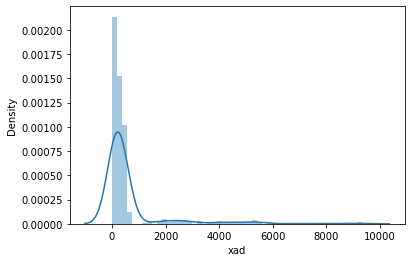

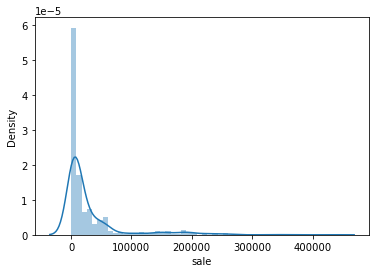

In [1346]:
#Check the distribution of xad:
# Is Normal Distribution Necessary in Regression? 
# https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(use_xrd1.xad)
plt.show()
sns.distplot(use_xrd1.sale)
plt.show()


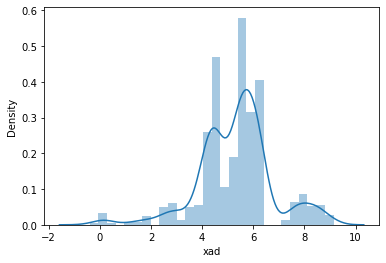

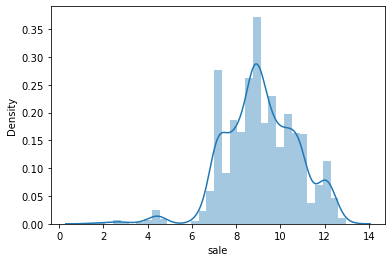

In [1356]:
sns.distplot(np.log(use_xrd1.xad))
plt.show()
sns.distplot(np.log(use_xrd1.sale))
plt.show()

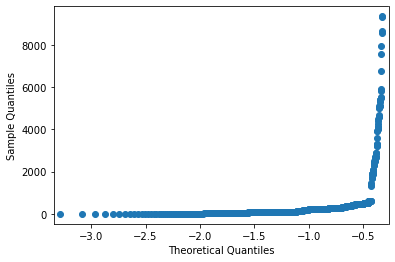

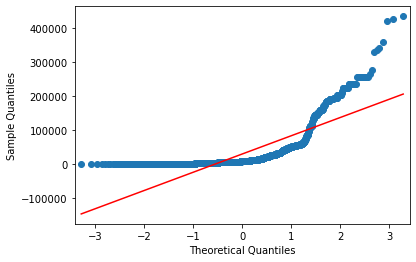

In [1353]:
from statsmodels.graphics.gofplots import qqplot
fig = qqplot(use_xrd1.xad,line='s')
plt.show()

fig = qqplot(use_xrd1.sale,line='s')
plt.show()

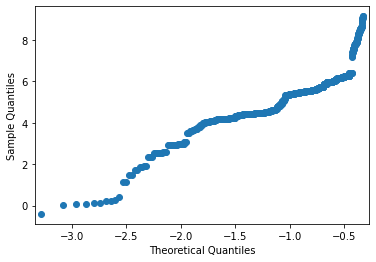

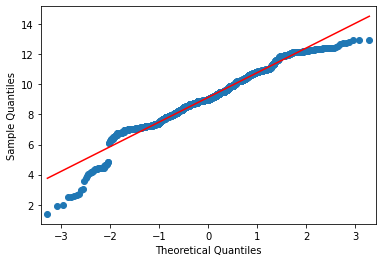

In [1355]:
import numpy as np
fig = qqplot(np.log(use_xrd1.xad),line='s')
plt.show()

fig = qqplot(np.log(use_xrd1.sale),line='s')
plt.show()

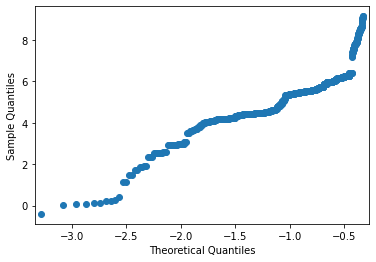

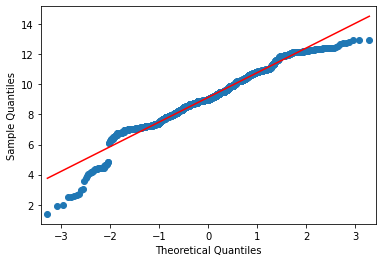

In [1357]:
# Dosn't work after dropping some outliers.

fig = qqplot(np.log(use_xrd1.loc[~use_xrd1.gvkey\
                          .isin(['101204', '1078', '6266', '5073', '4839', '100080'])]\
                          .xad),line='s')
plt.show()

fig = qqplot(np.log(use_xrd1.loc[~use_xrd1.gvkey\
                                 .isin(["5073", "4503", "2991","5047","4839"])]\
                                 .sale),line='s')
plt.show()

In [1361]:
use_xrd1.loc[use_xrd1.sale<=0]

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date,gvkey,fyear,act,lct,sale,ni,mkvalt,xad,xrd,ni_preyear,xrd_ni_preyear,xrd_ni,act_preyear,xrd_act_preyear,xrd_act,fyear_count


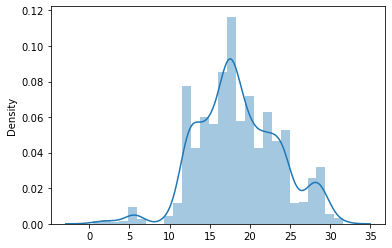

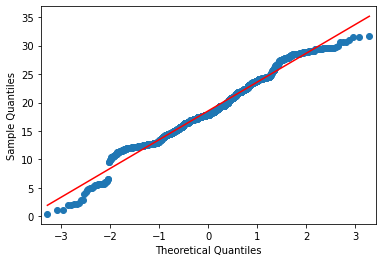

In [1366]:
#transform the data using box-cox
from scipy import stats
sale_transformed, lambd, ci = stats.boxcox(x=np.log(use_xrd1.sale), alpha=0.5)

#plot the distribution curve and QQ-plot for transformed data
sns.distplot(sale_transformed)
plt.show()
fig = qqplot(sale_transformed,line='s')
plt.show()

In [1367]:
lambd, ci

(1.5183267880142448, (1.4624975427016282, 1.5748277406811586))

In [1368]:
# Set another period: 2012, 2013, 2014, 2015(treat0), 2016, 2017, 2018

# Select the pre-treat & post-treat periods.
use_xrd = chem_rd.loc[(chem_rd.fyear >= 2012) & (chem_rd.fyear <= 2018) \
                      & (~chem_rd.xrd_ni_preyear.isna()) & (~chem_rd.xrd_ni.isna())]                    
# Debug: cannot use 'col is not None'. Should use ~ col.isna()


# Make sure each conm has full records in selected span.
use_count = use_xrd.groupby('conm')['fyear'].nunique()\
            .reset_index().rename(columns={'fyear': 'fyear_count'})
use_xrd2 = use_xrd.merge(use_count.loc[use_count.fyear_count == use_count.fyear_count.max()])

In [1369]:
use_xrd2.groupby('treat_firm')['conm'].nunique()

treat_firm
0    24
1    24
Name: conm, dtype: int64

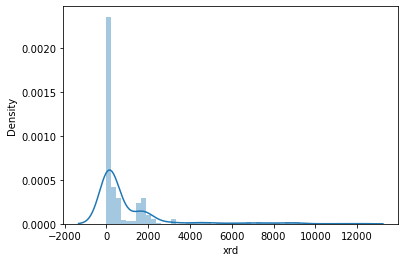

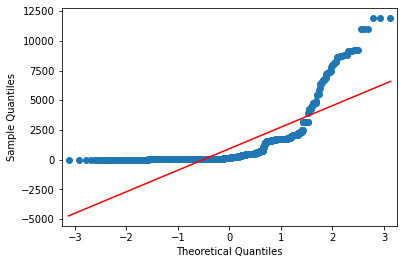

In [1372]:
sns.distplot(use_xrd2.xrd)
plt.show()
fig = qqplot(use_xrd2.xrd,line='s')
plt.show()

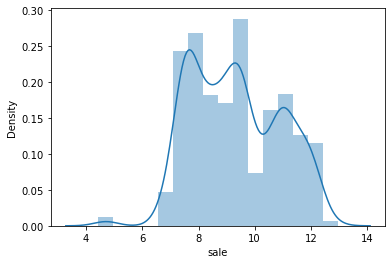

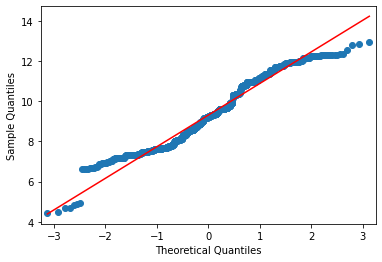

In [1370]:
sns.distplot(np.log(use_xrd2.sale))
plt.show()
fig = qqplot(np.log(use_xrd2.sale),line='s')
plt.show()

In [1373]:
use_xrd2.to_csv('clean_for_DID_2015.csv', index=False)

In [1344]:
use_xrd1.loc[use_xrd1.gvkey == 140760]

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date,gvkey,fyear,act,lct,sale,ni,mkvalt,xad,xrd,ni_preyear,xrd_ni_preyear,xrd_ni,act_preyear,xrd_act_preyear,xrd_act,fyear_count
1150,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2003,4962.0,1944.0,4936.0,68.0,6753.5285,NaN,510.0,-1693.0,-30.124040,750.000000,4424.0,11.528029,10.278114,10
1151,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2004,4931.0,1894.0,5457.0,267.0,9677.5158,65.0,511.0,68.0,751.470588,191.385768,4962.0,10.298267,10.363010,10
1152,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2005,4644.0,2159.0,6294.0,255.0,17121.3134,65.0,854.0,267.0,319.850187,334.901961,4931.0,17.319002,18.389320,10
1153,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2006,5461.0,2279.0,7344.0,689.0,25768.3169,84.0,725.0,255.0,284.313725,105.224964,4644.0,15.611542,13.275957,10
1154,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2007,5084.0,3075.0,8563.0,993.0,38050.7717,84.0,973.0,689.0,141.219158,97.985901,5461.0,17.817250,19.138474,10
1155,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2008,7609.0,4439.0,11365.0,2024.0,62676.7503,95.0,1144.0,993.0,115.206445,56.521739,5084.0,22.501967,15.034827,10
1156,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2009,7883.0,3756.0,11724.0,2109.0,45748.7392,59.0,1261.0,2024.0,62.302372,59.791370,7609.0,16.572480,15.996448,10
1157,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2010,7050.0,3556.0,10483.0,1096.0,28450.7964,135.0,1205.0,2109.0,57.136083,109.945255,7883.0,15.286059,17.092199,10
1158,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2011,8809.0,4729.0,11822.0,1607.0,36898.0222,100.0,1386.0,1096.0,126.459854,86.247666,7050.0,19.659574,15.733909,10
1159,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,2016-12-01,Final risk evaluation (December 2020),NaT,MONSANTO COMPANY,MONSANTO CO,1,1,2006-04-23,140760,2012,9658.0,4221.0,13504.0,2045.0,46549.3191,87.0,1517.0,1607.0,94.399502,74.180929,8809.0,17.221024,15.707186,10


In [1337]:
use_xrd1.sample(20)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date,gvkey,fyear,act,lct,sale,ni,mkvalt,xad,xrd,ni_preyear,xrd_ni_preyear,xrd_ni,act_preyear,xrd_act_preyear,xrd_act,fyear_count
1748,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,JOHNSON AND JOHNSON PRODUCTS INC.,JOHNSON & JOHNSON,1,1,2006-04-23,6266,2011,54316.000,22811.000,65030.000,9672.000,178663.7255,2600.000,7548.000,13334.000,56.607170,78.039702,47307.000,15.955355,13.896458,10
468,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,EASTMAN KODAK CO.,EASTMAN KODAK CO,1,2,2006-04-23,4194,2011,2703.000,2150.000,6022.000,-764.000,176.2613,206.000,274.000,-687.000,-39.883552,-35.863874,3799.000,7.212424,10.136885,10
884,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,"E.I. DUPONT DE NEMOURS & COMPANY,INC.",DUPONT DE NEMOURS INC,1,1,2006-04-23,4060,2007,18654.000,12445.000,53513.000,2887.000,37069.2671,NaN,1362.000,3724.000,36.573577,47.177000,17209.000,7.914463,7.301383,10
1891,"Phosphoric acid, triphenyl ester (TPP)","Phosphoric acid, triphenyl ester (TPP)|TPP",115-86-6,2019-12-01,Final scope (August 2020),NaT,Procter &amp; Gamble,PROCTER & GAMBLE CO,0,0,NaT,8762,2004,17115.000,22147.000,51407.000,6481.000,138486.5407,5504.000,1802.000,5186.000,34.747397,27.804351,15220.000,11.839685,10.528776,10
1038,Ethylene dibromide,Ethylene dibromide|ethylene dibromide,106-93-4,2019-12-01,Final scope (August 2020),NaT,CHEVRON CHEMICAL CO.,CHEVRON CORP,0,0,NaT,2991,2011,53234.000,33600.000,236286.000,26895.000,210796.1688,NaN,627.000,19024.000,3.295837,2.331288,48841.000,1.283757,1.177819,10
1852,"Phosphoric acid, triphenyl ester (TPP)","Phosphoric acid, triphenyl ester (TPP)|TPP",115-86-6,2019-12-01,Final scope (August 2020),NaT,SEALED AIR CORPORATION,SEALED AIR CORP,0,0,NaT,9555,2005,1695.400,1533.500,4085.100,255.800,4575.1588,NaN,75.800,215.600,35.157699,29.632525,1611.200,4.704568,4.470921,10
1777,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,2019-12-01,Final scope (August 2020),2006-04-23,OWENS-CORNING FIBERGLAS CORP,OWENS CORNING,1,1,2006-04-23,8214,2010,1408.000,955.000,4997.000,933.000,3865.7150,NaN,76.000,64.000,118.750000,8.145766,1854.000,4.099245,5.397727,10
535,Methylene Chloride,Methylene Chloride|methylene chloride,75-09-2,2016-12-01,"Final risk evaluation (June 2020), Proposed ri...",NaT,"KOPPERS COMPANY, INC.",KOPPERS HOLDINGS INC,0,0,NaT,163113,2008,372.400,148.600,1364.800,138.000,441.6534,NaN,2.800,63.300,4.423381,2.028986,388.200,0.721278,0.751880,10
1285,Phthalic anhydride,Phthalic anhydride|phthalic anhydride,85-44-9,2019-12-01,Final scope (August 2020),NaT,DU PONT E I DE NEMOURS & CO INC,DU PONT (E I) DE NEMOURS,1,2,2006-04-23,4087,2008,15311.000,9710.000,31659.000,2007.000,22830.0622,NaN,1393.000,2988.000,46.619813,69.407075,13160.000,10.585106,9.098034,10
563,"Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...","Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...",117-81-7,2019-12-01,Final scope (August 2020),NaT,"KOPPERS COMPANY, INC.",KOPPERS HOLDINGS INC,0,0,NaT,163113,2006,349.500,187.200,1159.500,15.200,540.4311,NaN,2.500,9.900,25.252525,16.447368,290.900,0.859402,0.715308,10


In [1339]:
use_xrd1.groupby(['treat_firm'])['conm'].count()

treat_firm
0     530
1    1420
Name: conm, dtype: int64

In [ ]:
# Change '1,4-dioxane' to controls.

In [1345]:
use_xrd1.loc[use_xrd1.Chem_Comb == 'Dibutyl phthalate (1,2-Benzene- dicarboxylic acid, 1,2- dibutyl ester)|dibutyl phthalate']

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,chem_treat_date,Manufacturer,conm,treat_firm,count_treat_date,conm_treat_date,gvkey,fyear,act,lct,sale,ni,mkvalt,xad,xrd,ni_preyear,xrd_ni_preyear,xrd_ni,act_preyear,xrd_act_preyear,xrd_act,fyear_count
200,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2003,1715.144,1154.170,5407.764,332.058,4981.9592,238.7540,34.391,127.565,26.959589,10.356926,1505.993,2.283610,2.005138,10
201,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2004,1781.928,1520.137,6123.579,393.254,6282.8775,239.9530,34.313,332.058,10.333436,8.725404,1715.144,2.000590,1.925611,10
202,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2005,1894.385,1554.371,7190.661,463.258,6138.0134,257.1320,32.338,393.254,8.223184,6.980559,1781.928,1.814776,1.707045,10
203,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2006,2450.281,2074.815,7809.759,576.058,8492.0627,280.8560,36.883,463.258,7.961654,6.402654,1894.385,1.946964,1.505256,10
204,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2007,2069.580,2141.385,8005.292,615.578,7128.1246,256.2530,37.266,576.058,6.469140,6.053823,2450.281,1.520887,1.800655,10
205,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2008,1909.205,1936.736,7979.727,476.876,6992.8413,233.6040,37.469,615.578,6.086800,7.857179,2069.580,1.810464,1.962545,10
206,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2009,1770.019,1393.668,7094.249,435.848,6746.7911,218.3700,40.425,476.876,8.477046,9.275022,1909.205,2.117373,2.283874,10
207,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2010,2213.722,2063.940,7776.424,462.485,8963.0088,217.6370,39.883,435.848,9.150667,8.623631,1770.019,2.253253,1.801626,10
208,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2011,2261.593,2162.661,8765.699,441.860,9271.0466,227.3030,41.719,462.485,9.020617,9.441678,2213.722,1.884564,1.844673,10
209,"Dibutyl phthalate (1,2-Benzene- dicarboxylic a...","Dibutyl phthalate (1,2-Benzene- dicarboxylic a...",84-74-2,2019-12-01,Final scope (August 2020),NaT,SHERWIN WILLIAMS COMPANY,SHERWIN-WILLIAMS CO,1,1,2006-04-23,9667,2012,3149.238,1876.436,9534.462,631.034,15884.9914,247.4690,44.648,441.860,10.104558,7.075372,2261.593,1.974184,1.417740,10


Method2: Use LobbyView after merging the cpcat&Compustat.

In [291]:
#rd = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/ChemNews_Project/ChemNews_Project/rd_0709.csv',encoding='ISO-8859-1')
lobby = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/data/lobbying_df.csv',encoding='ISO-8859-1')
#lobby_view = pd.read_csv('/Users/sunxiaoting/Harris_Capp/EPIC/Data/LobbyView/dataset___client_level.csv')
#lobby_view.sample(1)

In [69]:
rd_firm = rd[['gvkey', 'conm']]
lobby_firm = lobby[['client', 'client_raw', 'ultorg']]

In [70]:
rd_lobby1 = rd_firm.merge(lobby_view, on='gvkey').merge(lobby_firm, left_on='client_name', right_on='client')

In [544]:
chem_rd = pd.merge(chem_firm_target, match_cpcat_rd, on= 'Manufacturer')
chem_rd = pd.merge(chem_rd, match_in_cpcat, on= 'Manufacturer').drop_duplicates()

In [545]:
chem_rd.shape

(1369, 11)

In [432]:
chem_rd.sample(5)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,ChemicalName,ProductName,Manufacturer,treat,conm,primary_manufacturer
1265,"Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...","Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...",117-81-7,December 2019,Final scope (August 2020),bis(2-ethylhexyl) phthalate,LACQUER C/N GLOSS BLUE 15102 ID 786516,"PRATT & LAMBERT, INC.",0,PRATT & LAMBERT UNITED INC,PRATT & LAMBERT
409,N-Methylpyrrolidone (NMP),N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,December 2016,Final risk evaluation (December 2020),1-methyl-2-pyrrolidone,"TEFLON FINISH, 459-517",E I DUPONT DE NEMOURS & CO,1,DUPONT DE NEMOURS INC,E. I. DUPONT DE NEMOURS & CO INC
1376,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),Formaldehyde,BUFFER SOLUTION (PH 1.),"FISHER SCIENTIFIC GROUP, INC",1,FISHER SCIENTIFIC INTL INC,FISHER SCIENTIFIC
30,Phthalic anhydride,Phthalic anhydride|phthalic anhydride,85-44-9,December 2019,Final scope (August 2020),PHTHALIC ANHYDRIDE,"PRISM 411 CLEAR TOUGHENED INSTANT ADHESIVE,",LOCTITE CORP,0,LOCTITE CORP,LOCTITE CORP
1325,"Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...","Di-ethylhexyl phthalate - (1,2-Benzene- dicarb...",117-81-7,December 2019,Final scope (August 2020),bis(2-ethylhexyl) phthalate,LAC ACRYLIC N/C CAM GRAY 36081,"PRATT AND LAMBERT INC, INDUSTRIAL COATINGS DIV.",0,PRATT & LAMBERT UNITED INC,PRATT & LAMBERT


# Important!

In [517]:
# Previous treat label marks the chemical reported by news.
# However, a firm producing multiple chemicals cannot be in treat & control group simultaneously. 
# Thus, only keep the firm in one research group.

grouped = chem_rd.groupby(['primary_manufacturer', 'conm'])['treat']\
                        .apply(lambda x: len(np.unique(x)))

In [552]:
firm_target = grouped[grouped == 1].index.to_frame(index=False)
firm_target

,primary_manufacturer,conm
0,ALLIED SIGNAL INC,HONEYWELL INTERNATIONAL INC
1,ASHLAND CHEMICAL CO,ASHLAND OIL CANADA LTD
2,BALL CHEMICAL CO,BALL CORP
3,"BARRIER INDUSTRIES, INC.",BARRIER THERAPEUTICS INC
4,BAXTER,BAXTER INTERNATIONAL INC
5,BECTON DICKINSON MICROBIOLOGY SYSTEMS,BECTON DICKINSON & CO
6,CARBOLINE CO,CARBOLINE CO
7,CARBORUNDUM ABRASIVES CO,CARBORUNDUM CO
8,CELANESE CHEMICAL CO INC,CELANESE AG
9,CELANESE CHEMICAL CO INC,CELANESE CORP


Actually, I can use only 'primary_manufacturer' to get target firm, as the matched 'primary_manufacturer-conm' pairs are of one-multiple relationships.

In [547]:
grouped1 = chem_rd.groupby(['primary_manufacturer'])['treat'].nunique()
pri_manuf_target = grouped1[grouped1 == 1].index.tolist()

In [554]:
# The number of primary_manufacturer obtained from the two ways are different, check!

set(firm_target.primary_manufacturer.tolist()) - set(pri_manuf_target)

{'ASHLAND CHEMICAL CO', 'COURTAULDS, PRC-DESOTO INTL', 'MALLINCKRODT INC'}

In [561]:
# After checking the absent three in pri_manuf_target, 
# add 'DE SOTO INC' conm in the next block. 

chem_rd.loc[chem_rd.primary_manufacturer == 'COURTAULDS, PRC-DESOTO INTL']

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,ChemicalName,ProductName,Manufacturer,treat,conm,primary_manufacturer
187,Carbon Tetrachloride,Carbon Tetrachloride|carbon tetrachloride,56-23-5,December 2016,Final risk evaluation (November 2020),carbon tetrachloride,"TRAFFIC PAINT YELLOW, 412",COURTAULDS COATINGS,0,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
188,Carbon Tetrachloride,Carbon Tetrachloride|carbon tetrachloride,56-23-5,December 2016,Final risk evaluation (November 2020),carbon tetrachloride,"TRAFFIC PAINT WHITE, 408",COURTAULDS COATINGS,0,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
189,"Butyl benzyl phthalate - 1,2-Benzene- dicarbox...","Butyl benzyl phthalate - 1,2-Benzene- dicarbox...",85-68-7,December 2019,Final scope (August 2020),benzyl butyl phthalate,"HYTHANE ULTRA, 8702A, PART A, BLACK",COURTAULDS COATINGS,0,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
190,"Butyl benzyl phthalate - 1,2-Benzene- dicarbox...","Butyl benzyl phthalate - 1,2-Benzene- dicarbox...",85-68-7,December 2019,Final scope (August 2020),benzyl butyl phthalate,"HYTHANE ULTRA, 8731A, PART A, WHITE",COURTAULDS COATINGS,0,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
191,"Butyl benzyl phthalate - 1,2-Benzene- dicarbox...","Butyl benzyl phthalate - 1,2-Benzene- dicarbox...",85-68-7,December 2019,Final scope (August 2020),benzyl butyl phthalate,"HYTHANE ULTRA, 8738A, PART A, XD BASE",COURTAULDS COATINGS,0,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
192,"Butyl benzyl phthalate - 1,2-Benzene- dicarbox...","Butyl benzyl phthalate - 1,2-Benzene- dicarbox...",85-68-7,December 2019,Final scope (August 2020),benzyl butyl phthalate,"HYTHANE ULTRA, 8739A, PART A, LT BASE",COURTAULDS COATINGS,0,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
193,"Butyl benzyl phthalate - 1,2-Benzene- dicarbox...","Butyl benzyl phthalate - 1,2-Benzene- dicarbox...",85-68-7,December 2019,Final scope (August 2020),benzyl butyl phthalate,"HYTHANE ULTRA, 8740A, PART A, DP BASE",COURTAULDS COATINGS,0,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
194,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),Formaldehyde,"INTERIOR-EXTERIOR LATEX, 6018 DEEP BASE",COURTAULDS COATINGS,1,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
195,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),Formaldehyde,"INTERIOR-EXTERIOR LATEX, 6019 TINTING WHITE",COURTAULDS COATINGS,1,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"
196,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),Formaldehyde,"FLAT WALL LATEX (PAINTERS FRIEND), 6099 TINT",COURTAULDS COATINGS,1,COURTAULDS PLC,"COURTAULDS, PRC-DESOTO INTL"


In [572]:
chem_rd_target = chem_rd[chem_rd['primary_manufacturer'].isin(pri_manuf_target)] 
#need to use .isin([]), in [] doesn't work.
chem_rd_target = chem_rd_target.append(chem_rd.loc[chem_rd.conm == 'DE SOTO INC'])

In [573]:
# This is the final result of the merge by chem(EPA&news)-manufacturer(CPCat)-conm(Compustat) 

chem_rd_target.shape

(242, 11)

In [584]:
# Merge with OpenSecrets using LobbyView dataset.
rd_lobby_all.sample(1)

,GVKEY,conm,client_name,client,client_raw,_merge
2396,63051,ANDRX CORP,ANDRX CORP,Andrx Corp,ANDRX CORP,left_only


In [585]:
chem_rd_target.sample(1)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,ChemicalName,ProductName,Manufacturer,treat,conm,primary_manufacturer
249,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),Formaldehyde,KODAK FILM AND PAPER DYE (MAGENTA) CAT 186,EASTMAN KODAK COMPANY,1,EASTMAN KODAK CO,"EASTMAN CHEMICAL PRODUCTS,INC."


In [589]:
chem_rd_lobby = pd.merge(chem_rd_target, 
                        rd_lobby_all[['conm', 'client', 'client_raw', '_merge']],
                        how = 'inner', on = 'conm')


In [606]:
# Check if a primary_manufacturer serve as the treat and the control at the same time.
# No such primary_manufacturer!

set(chem_rd_lobby.loc[chem_rd_lobby['treat'] == 1].primary_manufacturer.unique())\
.intersection(set(chem_rd_lobby.loc[chem_rd_lobby['treat'] == 0].primary_manufacturer.unique()))

set()

In [607]:
chem_rd_lobby.loc[chem_rd_lobby['treat'] == 1].primary_manufacturer.unique()

array(['ALLIED SIGNAL INC', 'EASTMAN CHEMICAL PRODUCTS,INC.', 'HACH CO',
       'VULCAN MATERIALS CO', 'ECOLAB INC.', 'HENRY SCHEIN INC',
       'W R GRACE & CO', 'VALSPAR CORP', 'CELANESE CHEMICAL CO INC',
       'BECTON DICKINSON MICROBIOLOGY SYSTEMS', 'SHELL OIL COMPANY',
       'SANOFI DIAGNOSTICS PASTEUR', 'SEALED AIR CORPORATION',
       'GENERAL ELECTRIC', 'PROCTER & GAMBLE CO', 'MCKESSON CHEMICAL CO',
       'STEPAN COMPANY'], dtype=object)

In [608]:
chem_rd_lobby.loc[chem_rd_lobby['treat'] == 0].primary_manufacturer.unique()

array(['BAXTER', 'CHEVRON', 'GENERAL MOTORS CORP'], dtype=object)

In [624]:
chem_rd_lobby.sample(2)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,ChemicalName,ProductName,Manufacturer,treat,conm,primary_manufacturer,client,client_raw,_merge
111,"1,4-dioxane","1,4-dioxane",123-91-1,December 2016,Final risk evaluation (December 2020),"1,4-dioxane","SOLVENT 111,GENERAL PURPOSE GRADE,INDUSTRIA",VULCAN MATERIALS CO,1,VULCAN MATERIALS CO,VULCAN MATERIALS CO,Vulcan Materials,Vulcan Materials Company,left_only
84,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),Formaldehyde,174 9183 KODAK FLEXICOLOR STABILIZER AND REPLE...,EASTMAN KODAK COMPANY,1,EASTMAN KODAK CO,"EASTMAN CHEMICAL PRODUCTS,INC.",Eastman Kodak,EASTMAN KODAK COMPANY,left_only


In [46]:
#rd_pre = pd.read_csv('/Users/sunxiaoting/Harris_Capp/EPIC/Data/Compustat/R_and_D_all_US_annual_210623.csv')
lobby_lsc = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/data/lobbying_df.csv', encoding='ISO-8859-1')

In [634]:
rd_pre.columns

Index(['GVKEY', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'conm', 'curcd', 'act', 'csho', 'ebit', 'ebitda', 'ni', 'rdip',
       'rdipa', 'xrd', 'costat', 'mkvalt', 'prcc_f', 'prcl_f', 'csho_dc',
       'ebit_dc', 'ebitda_dc', 'ni_dc', 'rdip_dc', 'rdipa_dc', 'xrd_dc',
       'add1', 'add2', 'add3', 'add4', 'addzip', 'city', 'conml', 'county',
       'loc', 'naics', 'sic', 'state'],
      dtype='object')

In [47]:
lobby_lsc.sample(2)

,client,catcode,year,quarter,client_clean,uniqid,registrant_raw,registrant,isfirm,client_raw,ultorg,amount,source,self,includeNSFS,use,ind,type,typelong,affiliate,tot_amount,conm.distlag,treated
958175,North Shore-Long Island Jewish Healthsys,H2100,2011,4,north shore-long island jewish healthsys,|D877F527-60F4-482A-96A5-542D61A28767,"Peck, Madigan, Jones & Stewart, Inc.","Peck, Madigan et al",y,"The Ickes & Enright Group, Inc. (on behalf of ...",North Shore-Long Island Jewish Healthsys,70000.0,webTL,n,,y,y,q4,FOURTH QUARTER REPORT,|,160000.0,NaN,0
706837,John Carroll University,H5100,2004,2,john carroll university,|C87D77C3-F09F-4A07-ACDF-52142D76D8D5,JOHN CARROLL UNIV,John Carroll University,NaN,JOHN CARROLL UNIV,John Carroll University,20000.0,lobny,p,,y,y,m,MID-YEAR REPORT,|,20000.0,NaN,0


In [ ]:
#chem_rd_lobby.rename(columns={'Chem_Comb': 'Chemical_Comb'}, inplace=True)

In [648]:
# Create a whole dataset: news-EPAchems-rd_data-lobby_data

# Add news
chem_rd_lobby_news = pd.merge(chem_rd_lobby, news, left_on='Chem_Comb', right_on='Chemical_Comb')

# Add rd_data

# Add lobby_data

# Align the datetime format

In [650]:
pd.set_option('display.max_columns', None)

chem_rd_lobby_news.sample(2)

,Chemical_Name,Chem_Comb,CASRN,Date_Initiated,Status,ChemicalName,ProductName,Manufacturer,treat,conm,primary_manufacturer,client,client_raw,_merge,GOID,Date,Title,Text,Author,Source,Chemical_innews,Chemical_Comb,Summary
17944,"Phosphoric acid, triphenyl ester (TPP)","Phosphoric acid, triphenyl ester (TPP)|TPP",115-86-6,December 2019,Final scope (August 2020),triphenyl phosphate,NORYL,GENERAL ELECTRIC CO,1,GENERAL ELECTRIC CO,GENERAL ELECTRIC,General Electric,GENERAL ELECTRIC COMPANY (FORMERLY KNOWN AS GE...,right_only,1806969808,2016-07-27,Bill Clinton addresses a very different party,"""PHILADELPHIA - PHILADELPHIA - It was Bill Cli...","Balz, Dan",twp,TPP,"Phosphoric acid, triphenyl ester (TPP)|TPP",The Democratic Party that nominated Hillary Cl...
3734,Formaldehyde,Formaldehyde|formaldehyde,50-00-0,December 2019,Final scope (August 2020),Formaldehyde,"169 3282,EKTPRINT R-S STABLIZER & REPLNSHER",EASTMAN KODAK COMPANY,1,EASTMAN KODAK CO,"EASTMAN CHEMICAL PRODUCTS,INC.",Eastman Kodak,EASTMAN KODAK COMPANY,left_only,1682326375,2015-05-22,Lumber Liquidators' Founder Steps In as Chief ...,"""Lumber Liquidators, under scrutiny for months...","Abrams, Rachel",nyt,Formaldehyde,Formaldehyde|formaldehyde,"Lumber Liquidators’ CEO and president, Robert ..."


*Mark: LobbyView links the 'client_raw' values(and some 'client') in OpenSecrets(lobby) dataset, renamed as 'client_name', with the GVKEY values in Compustat(rd) dataset.*

In [212]:
lobby_view = pd.read_csv('/Users/sunxiaoting/Harris_Capp/EPIC/Data/LobbyView/dataset___client_level.csv')
rd = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/data/rd_df.csv',encoding='ISO-8859-1')
lobby = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/data/lobbying_df.csv',encoding='ISO-8859-1')

In [240]:
lobby_view.dtypes

client_uuid       object
client_name       object
gvkey            float64
bvdid             object
primary_naics    float64
dtype: object

In [241]:
lobby_view.sample(2)

,client_uuid,client_name,gvkey,bvdid,primary_naics
26751,7edb15d8-28bc-5ddf-8bc6-98110c69de41,Silver Cross Health System,NaN,US130801550L,NaN
29108,8a0c275f-1eea-533a-9a20-9e85079f8376,SHAW PITTMAN POTTS & TROWBRIDGE,NaN,US164881758L,NaN


In [219]:
lobby.sample(2)

,client,catcode,year,quarter,client_clean,uniqid,registrant_raw,registrant,isfirm,client_raw,...,self,includeNSFS,use,ind,type,typelong,affiliate,tot_amount,conm.distlag,treated
920344,Natl Assn Relationship & Marriage Edu,Y4000,2010,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,manually added,NaN,NaN,NaN,0
965605,Northwestern Mutual Life Insurance,F3100,2001,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,manually added,NaN,NaN,NaN,0


In [242]:
rd.dtypes

GVKEY          int64
datadate      object
fyear        float64
indfmt        object
consol        object
popsrc        object
datafmt       object
tic           object
conm          object
curcd         object
act          float64
csho         float64
ebit         float64
ebitda       float64
ni           float64
rdip         float64
rdipa        float64
xrd          float64
costat        object
mkvalt       float64
prcc_f       float64
prcl_f       float64
csho_dc      float64
ebit_dc      float64
ebitda_dc    float64
ni_dc        float64
rdip_dc      float64
rdipa_dc     float64
xrd_dc       float64
add1          object
add2          object
add3          object
add4          object
addzip        object
city          object
conml         object
county        object
loc           object
naics        float64
sic          float64
state         object
dtype: object

In [220]:
rd.sample(2)

,GVKEY,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,add3,add4,addzip,city,conml,county,loc,naics,sic,state
156737,12625,12/31/1997,1997.0,INDL,C,D,STD,MRTN,MARTEN TRANSPORT LTD,USD,...,NaN,NaN,54755,Mondovi,Marten Transport Ltd,NaN,USA,484230.0,4213.0,WI
106551,8607,12/31/1996,1996.0,INDL,C,D,STD,PDM.1,PITT-DES MOINES INC,USD,...,NaN,NaN,77380,The Woodlands,Pitt-Des Moines Inc,NaN,USA,421510.0,5051.0,TX


#### Start Merging...

1st Step: merge the Compustat(rd) with LobbyView.

In [226]:
rd_lobby = pd.merge(rd[['GVKEY', 'conm']], lobby_view[['client_name','gvkey']], how='inner', left_on='GVKEY', right_on='gvkey')

In [235]:
rd_lobby.drop_duplicates(inplace=True)
rd_lobby.reset_index(inplace=True)
rd_lobby.drop(columns=['index', 'gvkey'], inplace=True)

In [271]:
rd_lobby.shape

(4087, 3)

In [272]:
rd_lobby.head(2)

,GVKEY,conm,client_name
0,1004,AAR CORP,AAR Corp.
1,1034,ALPHARMA INC -CL A,ALPHARMA US HUMAN PHARMACEUTICALS


2nd Step: merge the two with OpenSecrets(lobby), on both the 'client' & 'client_raw'.

In [273]:
rd_lobby1 = pd.merge(rd_lobby, lobby[['client', 'client_raw']], left_on='client_name', right_on='client').drop_duplicates()
rd_lobby2 = pd.merge(rd_lobby, lobby[['client', 'client_raw']], left_on='client_name', right_on='client_raw').drop_duplicates()

In [280]:
rd_lobby1.shape, rd_lobby2.shape

((1246, 5), (3662, 5))

In [284]:
rd_lobby1.dropna(subset='client_raw', inplace=True)
rd_lobby2.dropna(subset='client', inplace=True)

In [297]:
rd_lobby1.shape, rd_lobby2.shape, rd_lobby1.shape[0]+rd_lobby2.shape[0]

((903, 5), (3662, 5), 4565)

In [286]:
#Merged on client
rd_lobby1

,GVKEY,conm,client_name,client,client_raw
0,1062,ASA GOLD AND PRECIOUS METALS,ASA,ASA,ASA
8,1166,ASM INTERNATIONAL NV,ASM International,ASM International,ASM International
25,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,"ASHLAND, INC"
26,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,ASHLAND
31,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,ASHLAND INC
74,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,ASHLAND INC.
89,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,"Ashland, Inc."
93,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,Ashland Inc
94,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,ASHLAND INC ON BEHALF OF THE LIVINGSTON GROUP LLC
142,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,Ashland Oil


In [287]:
#Merged on client_raw
rd_lobby2

,GVKEY,conm,client_name,client,client_raw
0,1004,AAR CORP,AAR Corp.,AAR Corp,AAR Corp.
42,1034,ALPHARMA INC -CL A,ALPHARMA US HUMAN PHARMACEUTICALS,Alpharma Human Pharmaceuticals,ALPHARMA US HUMAN PHARMACEUTICALS
47,1034,ALPHARMA INC -CL A,"ALPHARMA, INC",Alpharma Inc,"ALPHARMA, INC"
58,1045,AMERICAN AIRLINES GROUP INC,AMERICAN AIRLINES TRAINING INSTITUTE,American Airlines Training Institute,AMERICAN AIRLINES TRAINING INSTITUTE
61,1045,AMERICAN AIRLINES GROUP INC,AMERICAN AIRLINES,American Airlines,AMERICAN AIRLINES
503,1056,AEROFLEX INC,"Aeroflex, Inc.",Aeroflex Inc,"Aeroflex, Inc."
519,1056,AEROFLEX INC,AEROFLEX WICHITA INC,Aeroflex Wichita,AEROFLEX WICHITA INC
523,1062,ASA GOLD AND PRECIOUS METALS,ASA,ASA,ASA
528,1075,PINNACLE WEST CAPITAL CORP,Pinnacle West Capital Corporation,Pinnacle West Capital,Pinnacle West Capital Corporation
587,1076,PROG HOLDINGS INC,"Aaron's, Inc.",Aaron's Inc,"Aaron's, Inc."


In [294]:
# Union the two DFs: and mark the sources of each record.

rd_lobby_all = rd_lobby2.merge(rd_lobby1.drop_duplicates(),\ #delete the rd_lobby1 records that stored in rd_lobby2. 
                               on=['GVKEY', 'conm', 'client_name', 'client', 'client_raw'], 
                   how='outer', indicator=True)

rd_lobby_all.shape #Less than 4565

(4242, 6)

In [306]:
rd_lobby_all.groupby('_merge').count()  # More matches on 'client_raw'(left_only)

,GVKEY,conm,client_name,client,client_raw
_merge,,,,,
left_only,3339,3339,3339,3339,3339
right_only,580,580,580,580,580
both,323,323,323,323,323


In [299]:
# Firms matched by both 'client' & 'client_raw'
rd_lobby_all[rd_lobby_all._merge == 'both']

,GVKEY,conm,client_name,client,client_raw,_merge
7,1062,ASA GOLD AND PRECIOUS METALS,ASA,ASA,ASA,both
18,1166,ASM INTERNATIONAL NV,ASM International,ASM International,ASM International,both
103,1794,ASHLAND GLOBAL HOLDINGS INC,Ashland Inc,Ashland Inc,Ashland Inc,both
105,1837,SOUTHERN CO GAS,AGL Resources,AGL Resources,AGL Resources,both
155,2285,BOEING CO,Boeing Employees' Credit Union,Boeing Employees' Credit Union,Boeing Employees' Credit Union,both
156,2285,BOEING CO,Boeing Air Traffic Management,Boeing Air Traffic Management,Boeing Air Traffic Management,both
168,2369,BROOKFIELD ASSET MANAGEMENT,Brookfield Power,Brookfield Power,Brookfield Power,both
177,2410,BP PLC,BP Biofuels,BP Biofuels,BP Biofuels,both
182,2448,MATERION CORP,Brush Engineered Materials,Brush Engineered Materials,Brush Engineered Materials,both
209,2696,CANADIAN NATIONAL RAILWAY CO,Canadian National Railway,Canadian National Railway,Canadian National Railway,both


In [138]:
# Abandon!

casrn_dic = {'1,4-dioxane':'123-91-1',
            'Asbestos|asbestos':'1332-21-4',
            'Formaldehyde|formaldehyde': '50-00-0',
            'N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP': '872-50-4',
            'Octamethylcyclotetra- siloxane (D4)|octamethylcyclotetra-siloxane|D4': '556-67-2',
            'Phosphoric acid, triphenyl ester (TPP)|TPP': '115-86-6',
            'Trichlorethylene (TCE)|trichloroethylene|TCE': '79-01-6'}

casrn_df = pd.DataFrame({'Chem_Comb':casrn_dic.keys(),\
                         'Casrn':casrn_dic.values()})
                                    
casrn_df  #7 out of 33 EPA chemicals were reported.

,Chem_Comb,Casrn
0,"1,4-dioxane",123-91-1
1,Asbestos|asbestos,1332-21-4
2,Formaldehyde|formaldehyde,50-00-0
3,N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4
4,Octamethylcyclotetra- siloxane (D4)|octamethyl...,556-67-2
5,"Phosphoric acid, triphenyl ester (TPP)|TPP",115-86-6
6,Trichlorethylene (TCE)|trichloroethylene|TCE,79-01-6


In [156]:
casrn_df['CODE'] = casrn_df.Casrn.map(lambda x: 'C'+''.join(x.split('-')))

In [157]:
casrn_df

,Chem_Comb,Casrn,CODE
0,"1,4-dioxane",123-91-1,C123911
1,Asbestos|asbestos,1332-21-4,C1332214
2,Formaldehyde|formaldehyde,50-00-0,C50000
3,N-Methylpyrrolidone (NMP)|n-methylpyrrolidone|NMP,872-50-4,C872504
4,Octamethylcyclotetra- siloxane (D4)|octamethyl...,556-67-2,C556672
5,"Phosphoric acid, triphenyl ester (TPP)|TPP",115-86-6,C115866
6,Trichlorethylene (TCE)|trichloroethylene|TCE,79-01-6,C79016


Step1: Find chemicals that were discovered harmful by scientists. This is to narrow down the work and better prepared for CI Analysis.

Method 1: Use set intersection method to find the chems.

In [75]:
all_chem_nyt = []
for c in nyt.Chemical_Comb.unique():
    all_chem_nyt.extend(c.split('|'))
all_chem_nyt

['Asbestos',
 'asbestos',
 'Trichlorethylene (TCE)',
 'trichloroethylene',
 'TCE',
 'Perchloroethylene',
 'perchloroethylene',
 'Octamethylcyclotetra- siloxane (D4)',
 'octamethylcyclotetra-siloxane',
 'D4',
 'Formaldehyde',
 'formaldehyde',
 'C.I. Pigment Violet 29 (PV29)',
 'PV29',
 'Dibutyl phthalate (1,2-Benzene- dicarboxylic acid, 1,2- dibutyl ester)',
 'dibutyl phthalate',
 '1,4-dioxane',
 'N-Methylpyrrolidone (NMP)',
 'n-methylpyrrolidone',
 'NMP',
 'Phosphoric acid, triphenyl ester (TPP)',
 'TPP',
 '1-Bromopropane',
 '1-bromopropane',
 '1-BP']

In [87]:
all_chem_twp = []
for c in twp.Chemical_Comb.unique():
    all_chem_twp.extend(c.split('|'))
all_chem_twp


['Asbestos',
 'asbestos',
 'N-Methylpyrrolidone (NMP)',
 'n-methylpyrrolidone',
 'NMP',
 'Formaldehyde',
 'formaldehyde',
 '1,4-dioxane',
 'Cyclic Aliphatic Bromide Cluster (HBCD)',
 'cyclic aliphatic bromide cluster',
 'HBCD',
 'Trichlorethylene (TCE)',
 'trichloroethylene',
 'TCE',
 'Di-isononyl phthalate (DINP) – (1,2-benzenedicarboxylic acid, 1,2-diisononyl ester)',
 'DINP',
 'Phosphoric acid, triphenyl ester (TPP)',
 'TPP',
 'Octamethylcyclotetra- siloxane (D4)',
 'octamethylcyclotetra-siloxane',
 'D4',
 'Methylene Chloride',
 'methylene chloride']

In [58]:
#Andy's work about chem discoveries by scientists.
#chem_ori_df = pd.read_csv('/Users/sunxiaoting/Harris_Capp/MyStudy/data/chem_firm_product_date_rd.csv')

# chem_ori_df.head(3)

,CASRN,ChemicalName,Chemical,ProductName,Effect,Scrape Date,primary_manufacturer,conm
0,75-52-5,nitromethane,Nitromethane,FREON TP-35,Neurological,1984,CHEMTRONICS INC,CHEM-TRONICS INC
1,75-52-5,nitromethane,Nitromethane,FREON TP-35,Cancer,1997,CHEMTRONICS INC,CHEM-TRONICS INC
2,75-69-4,trichlorofluoromethane,Trichlorofluoromethane (CFC-11),"ELECTRO WASH C80, C16, C24, C240-4",NaN,4/28/1976,CHEMTRONICS INC,CHEM-TRONICS INC


In [85]:
chem_ori_chemname = list(chem_ori_df.ChemicalName.unique())
chem_ori_chemname.extend(list(chem_ori_df.Chemical.unique()))
chem_ori_chemname

['nitromethane',
 'trichlorofluoromethane',
 'Phenolphthalein',
 'hydrogen chloride',
 '4,4-bi-o-toluidine',
 'Butan-1-Ol',
 'selenium',
 '1,1,2-trichloroethane',
 'O-DICHLOROBENZENE',
 '1-bromopropane',
 'tetrafluoroethylene',
 'diuron',
 'benomyl',
 'paraquat-dichloride',
 'RESORCINOL DIGLYCIDYL ETHER',
 '1,1,1,2-tetrachloroethane',
 'tetranitromethane',
 'atrazine',
 '4-chloroaniline',
 'isoprene',
 'amitraz',
 'benfluralin',
 'acephate',
 '2,3-epoxypropan-1-ol',
 'Nitromethane ',
 'Trichlorofluoromethane (CFC-11)',
 'Phenolphthalein',
 'Hydrochloric acid (acid aerosols including mists, vapors, gas, fog, and other airborne forms of any particle size)',
 "3,3'-Dimethylbenzidine (o-Tolidine)",
 'n-Butyl alcohol',
 'Selenium',
 '1,1,2-Trichloroethane',
 '1,2-Dichlorobenzene',
 '1-Bromopropane',
 'Tetrafluoroethylene',
 'Diuron',
 'Benomyl',
 'Paraquat dichloride',
 'Diglycidyl resorcinol ether',
 '1,1,1,2-Tetrachloroethane',
 'Tetranitromethane ',
 "Atrazine (6-Chloro-N-ethyl-N'-(1-met

In [89]:
# Find the intersection of the two sets.

# With nyt
print(set(all_chem_nyt).intersection(set(chem_ori_chemname)))

# With twp
print(set(all_chem_twp).intersection(set(chem_ori_chemname)))

{'1-Bromopropane', '1-bromopropane'}
set()


Method 2: Filter the chem_ori_df to find if there exist the record.

In [97]:
def find_chem_ori(df, chem_ori_df):
    chem_ori_list = []
    for chems in df.Chemical_Comb.unique():
        for chem in chems.split('|'):
            if chem_ori_df.loc[chem_ori_df['ChemicalName'] == chem].shape[0] > 0\
            or chem_ori_df.loc[chem_ori_df['Chemical'] == chem].shape[0] > 0:
                chem_ori_list.append(chem)              
    return chem_ori_list

In [72]:
chems_for_study_twp = find_chem_ori(twp, chem_ori_df)
chems_for_study_twp

[]

Results: nyt reported only 1 chemical, twp nothing.

Step 2: Review the summary of the nyt articles containing '1-Bromopropane'or'1-bromopropane'.

In [49]:
chem_ori.loc[chem_ori['ChemicalName'] == '1-bromopropane'].primary_manufacturer.unique()

array(['GREAT LAKES CHEMICAL CORPORATION', 'ALBEMARLE CORPORATION',
       'ENVIRO TECH INTERNATIONAL INC', 'ALDRICH CHEMICAL CO INC'],
      dtype=object)

In [96]:
nyt[nyt['Chemical_Comb'] == '1-Bromopropane|1-bromopropane|1-BP']

,GOID,Date,Title,Text,Author,Source,Chemical,Chemical_Comb,Summary
155,1953544318,2017-10-22,Chemical Industry Insider Now Shapes E.P.A. Po...,"""WASHINGTON -- For years, the Environmental Pr...","Lipton, Eric",Newspapers,1-bromopropane,1-Bromopropane|1-bromopropane|1-BP,"Sure, I'd be happy to chat with you! What's on..."


In [118]:
list(nyt.loc[nyt['Chemical_Comb'] == '1-Bromopropane|1-bromopropane|1-BP']['Text'])

['"WASHINGTON -- For years, the Environmental Protection Agency has struggled to prevent an ingredient once used in stain-resistant carpets and nonstick pans from contaminating drinking water.The chemical, perfluorooctanoic acid, or PFOA, has been linked to kidney cancer, birth defects, immune system disorders and other serious health problems.So scientists and administrators in the E.P.A.\'s Office of Water were alarmed in late May when a top Trump administration appointee insisted upon the rewriting of a rule to make it harder to track the health consequences of the chemical, and therefore regulate it.The revision was among more than a dozen demanded by the appointee, Nancy B. Beck, after she joined the E.P.A.\'s toxic chemical unit in May as a top deputy. For the previous five years, she had been an executive at the American Chemistry Council, the chemical industry\'s main trade association.The changes directed by Dr. Beck may result in an ""underestimation of the potential risks to

Results: not ideal for research, only one article